In [1]:
# Re-executing after state reset

# 1 ── Church Booleans and helpers
TRUE  = lambda t: lambda f: t
FALSE = lambda t: lambda f: f
NOT   = lambda p: p(FALSE)(TRUE)
OR    = lambda p: lambda q: p(TRUE)(q)
AND   = lambda p: lambda q: p(q)(p)
IMP   = lambda p: lambda q: OR(NOT(p))(q)

to_bool = lambda cb: cb(True)(False)
of_bool = lambda b: TRUE if b else FALSE

# 2 ── Church pairs
PAIR   = lambda x: lambda y: lambda s: s(x)(y)
FIRST  = lambda p: p(TRUE)
SECOND = lambda p: p(FALSE)

# 3 ── Concrete weak preference (lexicographic ≥)
Bundle = tuple
PREF = lambda x: lambda y: of_bool(x >= y)     # tuple ≥ is lexicographic

# 4 ── Axiom λ-terms
A1 = lambda x: lambda y: OR(PREF(x)(y))(PREF(y)(x))
A2 = lambda x: lambda y: lambda z: IMP(AND(PREF(x)(y))(PREF(y)(z)))(PREF(x)(z))

# 5 ── Derived relations
IND = lambda x: lambda y: AND(PREF(x)(y))(PREF(y)(x))
SP  = lambda x: lambda y: AND(PREF(x)(y))(NOT(PREF(y)(x)))

# 6 ── Corollary proof-objects
R_refl       = lambda x: A1(x)(x)
SP_irrefl    = lambda x: NOT(SP(x)(x))
IND_sym      = lambda x: lambda y: IMP(IND(x)(y))(IND(y)(x))
IND_trans    = lambda x: lambda y: lambda z: IMP(AND(IND(x)(y))(IND(y)(z)))(IND(x)(z))
SP_trans     = lambda x: lambda y: lambda z: IMP(AND(SP(x)(y))(SP(y)(z)))(SP(x)(z))
Trichotomy   = lambda x: lambda y: OR(OR(SP(x)(y))(IND(x)(y)))(SP(y)(x))

# 7 ── Sanity check
b1, b2, b3 = (3,2), (4,1), (3,2)

tests = {
    "Reflexivity (x≽x)":               R_refl(b1),
    "Indifference reflexive":          IND(b1)(b1),
    "Indifference symmetric":          IND_sym(b1)(b3),
    "Indifference transitive":         IND_trans(b1)(b3)(b1),
    "Strict irreflexive (¬x≻x)":       SP_irrefl(b1),
    "Strict transitive":               SP_trans(b2)(b1)(b3),
    "Trichotomy b1,b2":                Trichotomy(b1)(b2),
}

for name, cb in tests.items():
    print(f"{name:<28}: {to_bool(cb)}")


Reflexivity (x≽x)           : True
Indifference reflexive      : True
Indifference symmetric      : True
Indifference transitive     : True
Strict irreflexive (¬x≻x)   : True
Strict transitive           : True
Trichotomy b1,b2            : True


# Outros Testes 

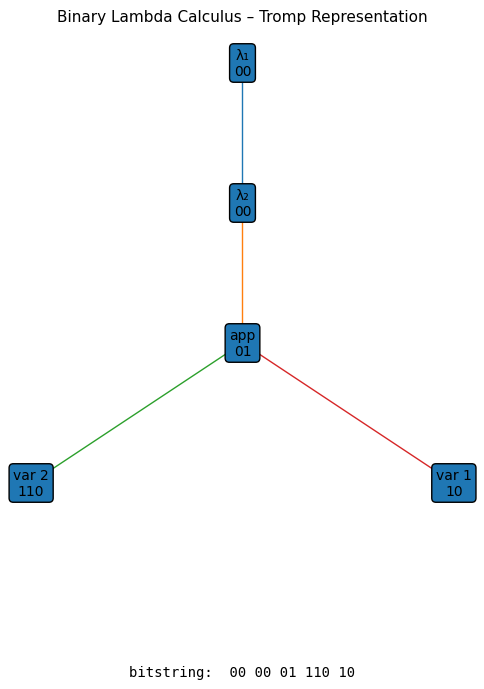

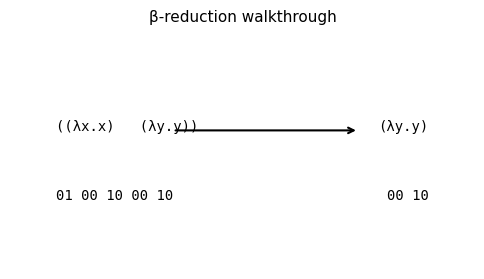

In [2]:
import matplotlib.pyplot as plt

# ──────────────────────────────────────────────────────────────
# Figure 1 – Tromp binary encoding of λx.λy.(x y)
# ──────────────────────────────────────────────────────────────

fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.set_title("Binary Lambda Calculus – Tromp Representation", fontsize=11, pad=15)

# Layout nodes manually
nodes = {
    "λ₁\n00": (0.5, 0.95),
    "λ₂\n00": (0.5, 0.75),
    "app\n01": (0.5, 0.55),
    "var 2\n110": (0.25, 0.35),
    "var 1\n10": (0.75, 0.35),
}

edges = [
    ("λ₁\n00", "λ₂\n00"),
    ("λ₂\n00", "app\n01"),
    ("app\n01", "var 2\n110"),
    ("app\n01", "var 1\n10"),
]

for p, c in edges:
    x0, y0 = nodes[p]
    x1, y1 = nodes[c]
    ax1.plot([x0, x1], [y0, y1], linewidth=1)

for label, (x, y) in nodes.items():
    ax1.text(x, y, label, ha="center", va="center",
             bbox=dict(boxstyle="round,pad=0.3"))

bitstring = "00 00 01 110 10"
ax1.text(0.5, 0.08, f"bitstring:  {bitstring}", ha="center", va="center",
         fontsize=10, fontfamily="monospace")
ax1.axis("off")


# ──────────────────────────────────────────────────────────────
# Figure 2 – β‑reduction walk‑through
# ──────────────────────────────────────────────────────────────

fig2, ax2 = plt.subplots(figsize=(6, 3))
ax2.set_title("β‑reduction walkthrough", fontsize=11, pad=12)

expr_left = "((λx.x)   (λy.y))"
expr_right = "(λy.y)"
bits_left = "01 00 10 00 10"
bits_right = "00 10"

ax2.text(0.1, 0.6, expr_left, fontfamily="monospace", fontsize=10)
ax2.text(0.9, 0.6, expr_right, fontfamily="monospace", fontsize=10, ha="right")
ax2.annotate("", xy=(0.75, 0.6), xytext=(0.35, 0.6),
             arrowprops=dict(arrowstyle="->", linewidth=1.5))
ax2.text(0.1, 0.3, bits_left, fontfamily="monospace", fontsize=10)
ax2.text(0.9, 0.3, bits_right, fontfamily="monospace", fontsize=10, ha="right")
ax2.axis("off")

plt.show()
